In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
train = pd.read_csv('input/data/train_data.csv')
test = pd.read_csv('input/data/test_data.csv')
sub = pd.read_csv('input/data/sample_submission.csv')

In [45]:
train["Timestamp"] = train["Timestamp"].astype("str")
date_info = train["Timestamp"].str.split(" ")

train["날짜"] = date_info.str.get(0)
train["시간"] = date_info.str.get(1)
dates = train["날짜"].str.split("-")
times = train["시간"].str.split(":")

train["year"] = dates.str.get(0)
train["month"] = dates.str.get(1)
train["day"] = dates.str.get(2)
train["hour"] = times.str.get(0)
train["minute"] = times.str.get(1)
train["second"] = times.str.get(2)

train["hour"] = train["hour"].astype(int)

In [35]:
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,날짜,시간,year,month,day,hour,minute,second,test_num,test_cat
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,00:17:11,2020,03,24,0,17,11,001,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,00:17:14,2020,03,24,0,17,14,001,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,00:17:22,2020,03,24,0,17,22,001,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,00:17:29,2020,03,24,0,17,29,001,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,00:17:36,2020,03,24,0,17,36,001,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,2020-06-05,06:50:21,2020,06,05,6,50,21,071,3
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,2020-08-21,01:06:39,2020,08,21,1,06,39,165,4
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,2020-08-21,01:06:50,2020,08,21,1,06,50,165,4
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,2020-08-21,01:07:36,2020,08,21,1,07,36,165,4


In [97]:
train["year"].unique()

array(['2020', '2019'], dtype=object)

## 시간대별 문제 개수

<AxesSubplot: ylabel='hour'>

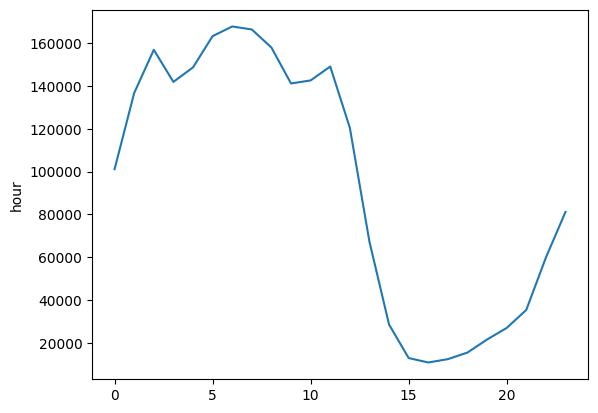

In [92]:
sns.lineplot(train['hour'].value_counts())

## 시간대별 정답률

<AxesSubplot: xlabel='hour', ylabel='answerCode'>

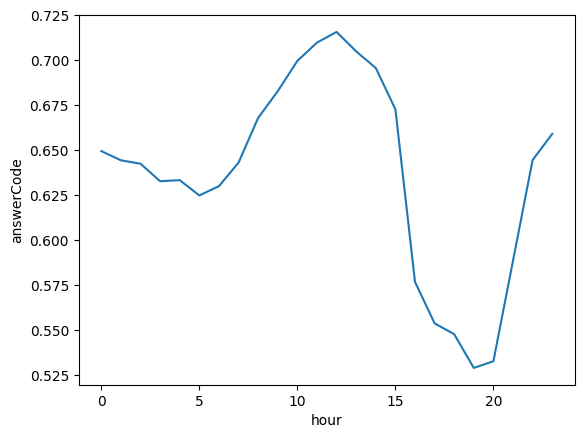

In [93]:
sns.lineplot(train.groupby("hour")["answerCode"].mean())

## 월별 정답률

<AxesSubplot: xlabel='month', ylabel='answerCode'>

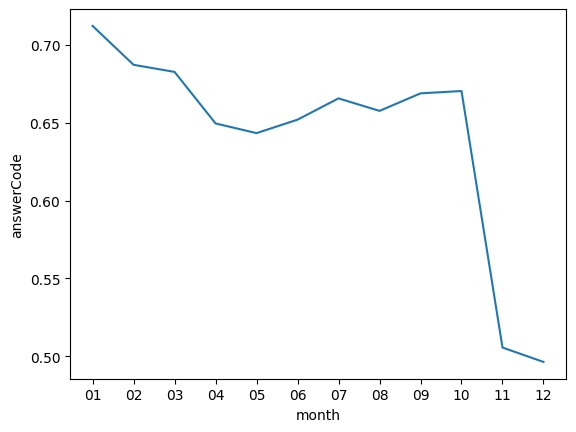

In [108]:
sns.lineplot(train.groupby("month")["answerCode"].mean())

## 월별 문제수

<AxesSubplot: ylabel='month'>

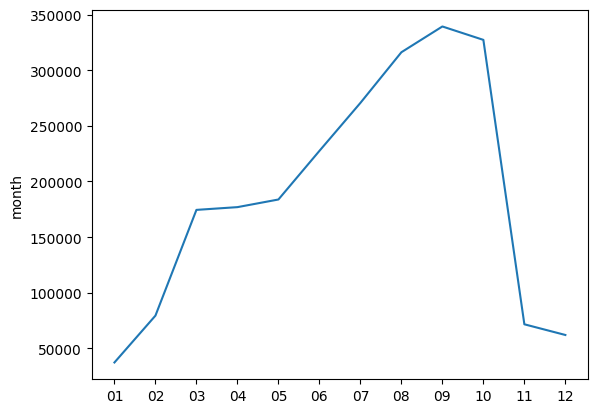

In [96]:
sns.lineplot(train['month'].value_counts().sort_index())